In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("./loan.xlsx")
df


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,0.1028,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,0.0743,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype         
---   ------                          --------------  -----         
 0    id                              39717 non-null  int64         
 1    member_id                       39717 non-null  int64         
 2    loan_amnt                       39717 non-null  int64         
 3    funded_amnt                     39717 non-null  int64         
 4    funded_amnt_inv                 39717 non-null  float64       
 5    term                            39717 non-null  object        
 6    int_rate                        39717 non-null  float64       
 7    installment                     39717 non-null  float64       
 8    grade                           39717 non-null  object        
 9    sub_grade                       39717 non-null  object        
 10   emp_title                       37258 non-null  object  

### Print top 5 rows to look at data

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### describe dataframe with Transpose to increase readability 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.0,516221.0,665665.0,837755.0,1077501.0
member_id,39717.0,850463.559408,265678.307421,70699.0,666780.0,850812.0,1047339.0,1314167.0
loan_amnt,39717.0,11219.443815,7456.670694,500.0,5500.0,10000.0,15000.0,35000.0
funded_amnt,39717.0,10947.713196,7187.238670,500.0,5400.0,9600.0,15000.0,35000.0
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.0,5000.0,8975.0,14400.0,35000.0
...,...,...,...,...,...,...,...,...
tax_liens,39678.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### As there many columns with null, print sum of null in columns 

In [6]:
column_with_nan = df.columns[df.isnull().any()]
for column in column_with_nan:
    print(column, df[column].isnull().sum())

emp_title 2459
emp_length 1075
desc 12940
title 12
mths_since_last_delinq 25682
mths_since_last_record 36931
revol_util 50
last_pymnt_d 71
next_pymnt_d 38577
last_credit_pull_d 2
collections_12_mths_ex_med 56
mths_since_last_major_derog 39717
annual_inc_joint 39717
dti_joint 39717
verification_status_joint 39717
tot_coll_amt 39717
tot_cur_bal 39717
open_acc_6m 39717
open_il_6m 39717
open_il_12m 39717
open_il_24m 39717
mths_since_rcnt_il 39717
total_bal_il 39717
il_util 39717
open_rv_12m 39717
open_rv_24m 39717
max_bal_bc 39717
all_util 39717
total_rev_hi_lim 39717
inq_fi 39717
total_cu_tl 39717
inq_last_12m 39717
acc_open_past_24mths 39717
avg_cur_bal 39717
bc_open_to_buy 39717
bc_util 39717
chargeoff_within_12_mths 56
mo_sin_old_il_acct 39717
mo_sin_old_rev_tl_op 39717
mo_sin_rcnt_rev_tl_op 39717
mo_sin_rcnt_tl 39717
mort_acc 39717
mths_since_recent_bc 39717
mths_since_recent_bc_dlq 39717
mths_since_recent_inq 39717
mths_since_recent_revol_delinq 39717
num_accts_ever_120_pd 39717
num_

### Remove columns with more than 50% null

In [7]:
for column in column_with_nan:
     if df[column].isnull().sum()*100.0/df.shape[0] > 50:
            df.drop(column,axis = 1,inplace = True)
          
               

### Get the info of data frame after null column removal

In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  object        
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  emp_title                   37258 non-null  object        
 11  emp_length                  38642 non-null  object    

### Check other columns which do not have impact on EDA. 
#### All values of id and memebr_id are unique i.e no duplicates. Hence these columns can be removed from EDA 

In [9]:

unique, counts = np.unique(df['id'], return_counts=True)
duplicate_id = {key: value for key, value in dict(zip(unique, counts)).items() if value > 1}
print(len(duplicate_id))

unique, counts = np.unique(df['member_id'], return_counts=True)
duplicate_member_id = {key: value for key, value in dict(zip(unique, counts)).items() if value > 1}
print(len(duplicate_member_id)) 

0
0


### All values of pymnt_plan are same. Hence these columns can be removed from EDA 

In [10]:
unique, counts = np.unique(df['pymnt_plan'], return_counts=True)
duplicate_pymnt_plan = {key: value for key, value in dict(zip(unique, counts)).items() if value > 1}
print(len(duplicate_pymnt_plan)) 

1


### Drop all cooumns wtih all unique/single value as they do not add significance to EDA 

In [11]:

column_with_insignificance = ['url','desc','purpose','title','zip_code','addr_state','id','member_id',
                              'emp_title','initial_list_status','collections_12_mths_ex_med','policy_code','pymnt_plan',
                              'application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']
for column in column_with_insignificance:
    df.drop(column,axis=1,inplace = True)

In [12]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                39717 non-null  int64         
 1   funded_amnt              39717 non-null  int64         
 2   funded_amnt_inv          39717 non-null  float64       
 3   term                     39717 non-null  object        
 4   int_rate                 39717 non-null  float64       
 5   installment              39717 non-null  float64       
 6   grade                    39717 non-null  object        
 7   sub_grade                39717 non-null  object        
 8   emp_length               38642 non-null  object        
 9   home_ownership           39717 non-null  object        
 10  annual_inc               39717 non-null  float64       
 11  verification_status      39717 non-null  object        
 12  issue_d                  39717 n

### Checking for rows with null

In [13]:
#Check if rows have more nan values which can be removed 
df.isnull().sum(axis=1).nlargest(3)
#Only max 2 nan values find in three rows. Hence removing rows will not add any signifcance to EDA 


4714     2
11282    2
13891    2
dtype: int64

### Checking for duplicates

In [14]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Standardize the columns

In [15]:
# round of precision for total_pymnt
df['total_pymnt'] = round(df['total_pymnt'],2)
df['total_rec_late_fee'] = round(df['total_rec_late_fee'],2)
#convert int_rate to int for anaylsis 
#df['int_rate'] = [(str).rstrip('%') for x in df['int_rate'] ]
# Convert revol_util to float for anaylsis
df['revol_util'] = [(str).rstrip('%') for x in df['revol_util'] ]
#df['revol_util'].str.rstrip('%').astype(float) 

### Replace with 0 if n/a or nan and clean the column  for 

In [16]:
df['emp_length'] = [0 if x == '< 1 year' or ''
                    else 0 if x == 'n/a'
                    else 0 if x == 'nan'
                    else '10+' if  x == '10+ years' 
                    else 1 if  x == '1 year' 
                    else str(x).removesuffix(' years')
                    for x in df['emp_length']] 
 



In [17]:
df['term'].describe()

count          39717
unique             2
top        36 months
freq           29096
Name: term, dtype: object

In [18]:
df['last_pymnt_d'].fillna("01/01/9999", inplace = True)

### Outlier Checks

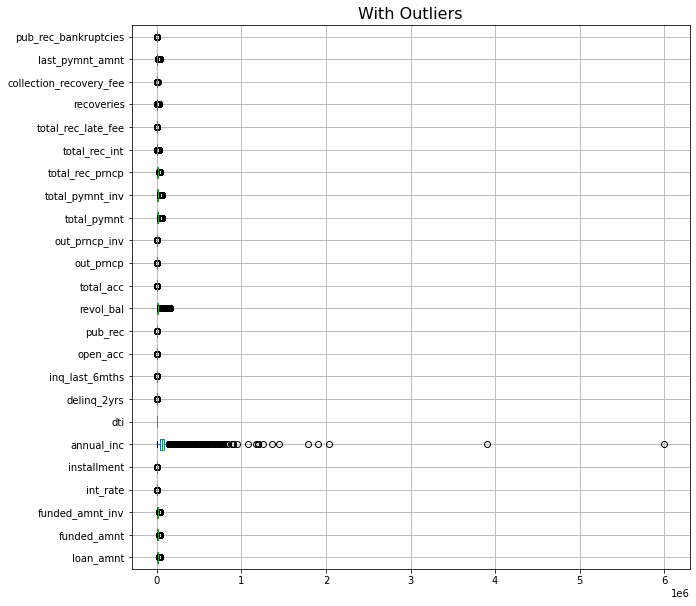

In [19]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index 
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

Inference : Based on Plot Above annual_inc has lot of outliers 

In [20]:
def detect_outlier_range(col):
    sorted(col)
    Q1=col.quantile([0.25]).loc[0.25]
    Q3=col.quantile([0.75]).loc[0.75]
    print(Q1,Q3)
    return Q1, Q3

### Function for Check if outlier can be removed

In [21]:
def check_remove_outlier(cont_var):
    for column in df[cont_var].columns:
        lr,ur=detect_outlier_range(df[column])
        outliers = [x for x in df[column] if x <= lr or x >= ur]
        retainedValues = [x for x in df[column] if x >= lr and x <= ur]
        outlierPercentage = (len(outliers)/len(df[column]))*100
    print(len(outliers),len(retainedValues),outlierPercentage)
    if outlierPercentage > 50: 
        return False 
    else: 
        return True
   

### Check remove outlier for annual_income column

In [22]:
annual_inc_cont = df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool') & (df.columns.values == 'annual_inc') ].index 
print(check_remove_outlier(annual_inc_cont))
#As more than 50% values are outliers we can not remove outliers , we need to treat them

40404.0 82300.0
19861 19859 50.006294533826825
False


### Treat Outlier with upper and lower ranges

In [23]:
def treat_outlier(cont):
    for column in df[cont].columns:
        lr,ur=detect_outlier_range(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

### Treat annual inc continuous variable

40404.0 82300.0


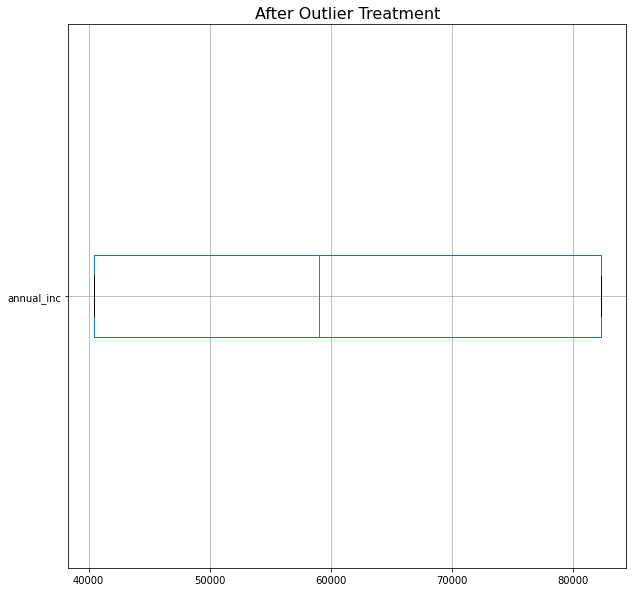

In [24]:
treat_outlier(annual_inc_cont)
plt.figure(figsize=(10,10))
df[annual_inc_cont].boxplot(vert=0)
plt.title('After Outlier Treatment',fontsize=16)
plt.show()

In [25]:
revol_bal_cont = df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool') & (df.columns.values == 'revol_bal') ].index 
print(check_remove_outlier(revol_bal_cont))
#As more than 50% values are outliers we can not remove outliers , we need to treat them

3703.0 17058.0
19861 19861 50.006294533826825
False


3703.0 17058.0


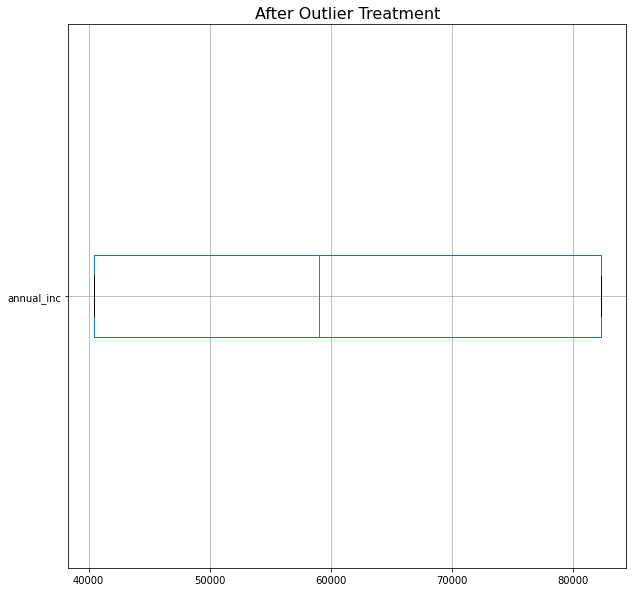

In [26]:
treat_outlier(revol_bal_cont)
plt.figure(figsize=(10,10))
df[annual_inc_cont].boxplot(vert=0)
plt.title('After Outlier Treatment',fontsize=16)
plt.show()

In [27]:
### Function to remove outliers 

In [28]:
def remove_outliers(cont):
        for column in df[cont].columns:
            lr,ur=detect_outlier_range(df[column])
            df[column]=[x for x in df[column] if x >= lr and x <= ur ]
        

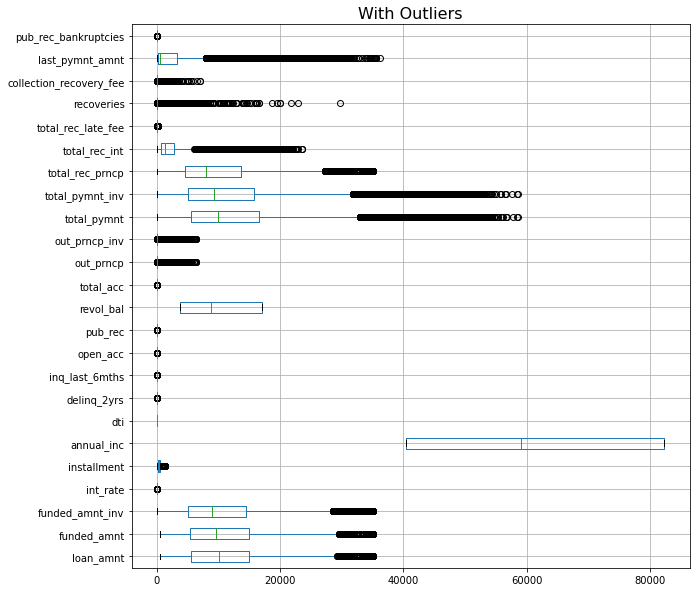

In [29]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index 
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

### Write the dataframe to CSV which can be used to furtehr analyze the data 

In [30]:
df.to_csv('dftocsv.csv', sep=',', encoding='utf-8', header='true')

### Categorical Variable analysis -Univariate analysis 

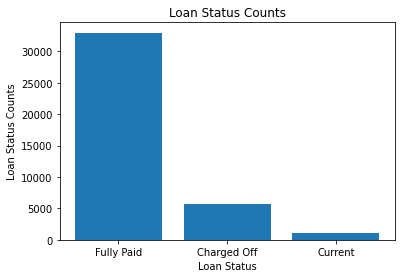

In [31]:
#Univariate analysis of loan status 
plt.bar(df['loan_status'].unique(),df['loan_status'].value_counts())
plt.xlabel("Loan Status")
plt.ylabel("Loan Status Counts")
plt.title("Loan Status Counts")
plt.show()

Inference: Above plot indicates that Fully paid loan status is approximately 6 times higher than charged off

### Univariate analysis of loan amount

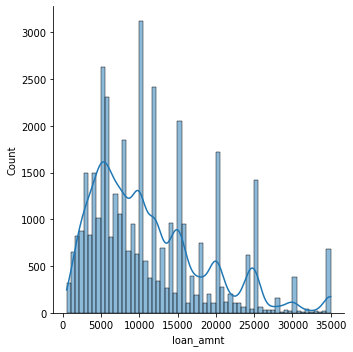

In [32]:
sns.displot(df['loan_amnt'],kde=True);

Inference: Loan amount graph indicates that loans have peaks at 5k,10k,15k i.e in intervals of 5k. Maximum loans with 10k amount are taken. There is downward trend in people who have taken loans with amount from 10k to 30k and there is peak again at 35k loan amount

### Univariate analysis of funded_amnt

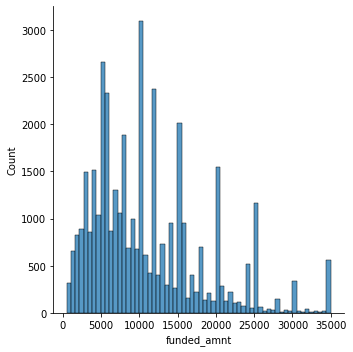

In [33]:
sns.displot(df['funded_amnt']);

Inference: Funded amount graph indicates that funds have peaks at 5k,10k,15k i.e. in intervals of 5k. Maximum funds with 10k amount are taken. There is downward trend in people who have taken loans with amount from 10k to 30k and there is peak again at 35k loan amount. Ths graph is exactly same as loan amount graph because in the current dataset loan amount and dunded amount have same data i.e all the loans are funded loans.

### Univariate analysis of installment

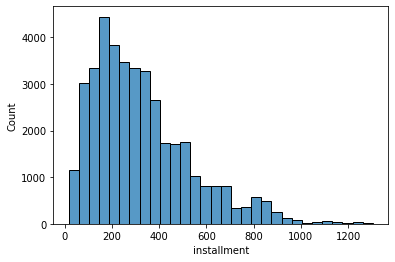

In [34]:
sns.histplot(df['installment'],bins = 30);
#.hist(bins = 30, facecolor='gray') ;


Inference: The graph here indicates that maximum frequency is between bins of 150-200 and frequency is lower as instalment amount increases 

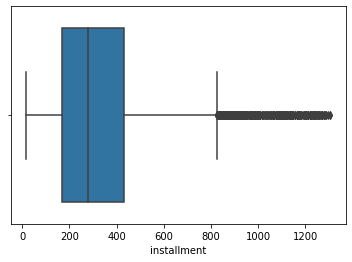

In [35]:
sns.boxplot(x = df['installment']);

Inference: The graph here indicates that there are outliers after upper extreme. Comparing with the previous histplot the frequency of higher ranges is less Hence outliers are present in less volumes

### Univariate Analysis of term

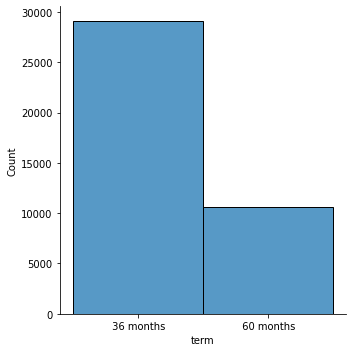

In [36]:
sns.displot(df['term']);

Inference: The graph here indicates maximum frequency is with 36 months category. We can combine with loan status vs term analysis we can infer 36 months category versus 60 months co-relation to defaulters

### Univariate Analysis of deliquency

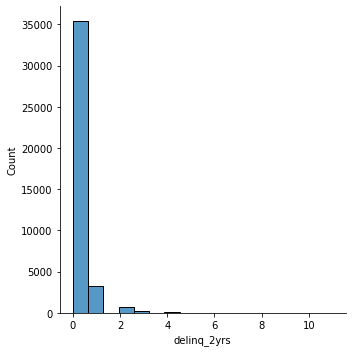

In [37]:
sns.displot(df['delinq_2yrs']);

Inference: The graph here indicates maximum frequency is 0 i.e deliquency rate is very low and many people do not have deliquency

### Univariate Analysis of employee length

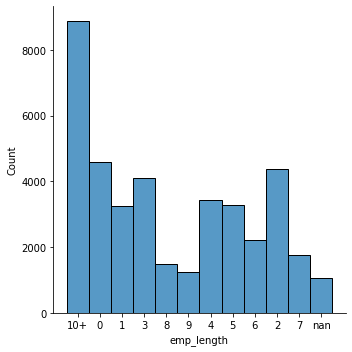

In [38]:
df['emp_length'] =df['emp_length'].astype(str)
df['emp_length'] =['10+' if x =='11' else x for x in df['emp_length'] ]
sns.displot( df['emp_length']);


Inference: The graph here indicates maximum frequency is 11 i.e. more than 10 years employee length so many employees are in that range 

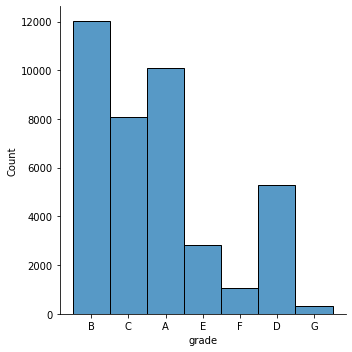

In [39]:
sns.displot( df['grade']);

Inference: The graph here indicates maximum frequency is in Grade B followed by A i.e. more than 10k loans are in Grade B abd A years employee length so many employees are in that range 

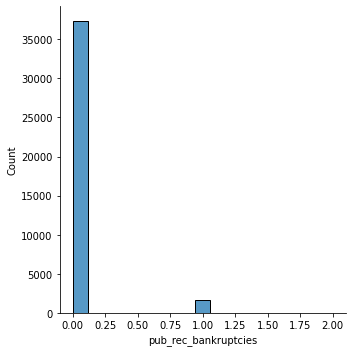

In [40]:
sns.displot( df['pub_rec_bankruptcies']);

Inference: The graph here indicates maximum frequency is at 0.

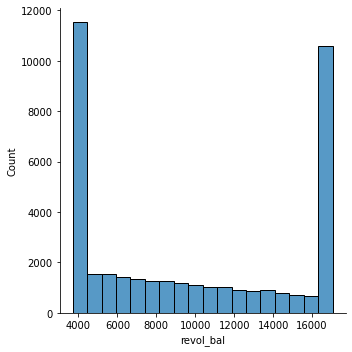

In [41]:
sns.displot( df['revol_bal']);

Inference: The graph here indicates maximum frequency is at 10k and 12k. This seems to be multi modal distribution

### Segmented Univariate Analysis - Create Segments 

In [42]:
loan_fullypaid = df[df['loan_status'] == 'Fully Paid']


In [43]:
loan_chargedoff = df[df['loan_status'] == 'Charged Off']


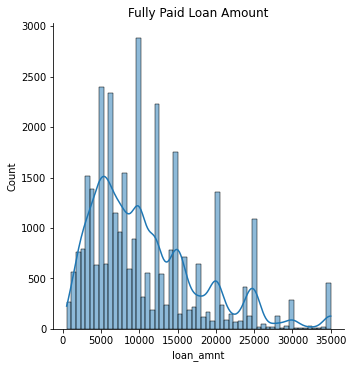

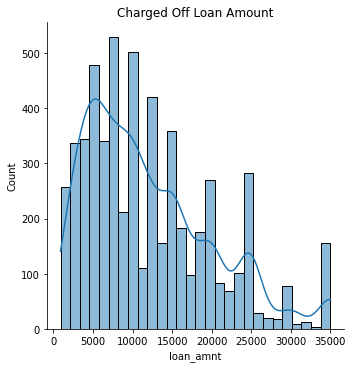

In [44]:
sns.displot(loan_fullypaid['loan_amnt'],kde=True).set(title='Fully Paid Loan Amount');
sns.displot(x=loan_chargedoff['loan_amnt'],kde=True).set(title='Charged Off Loan Amount');


Inference: Frequencey for Fully charged is more than the charged off and the peak vaule is also higher for the same

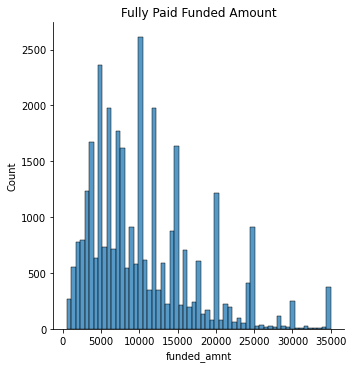

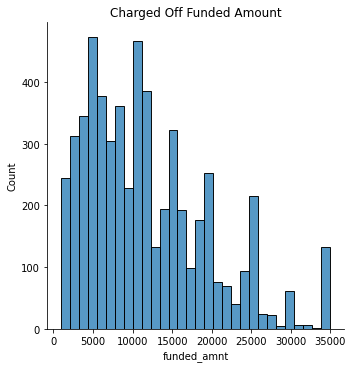

In [45]:
sns.displot(loan_fullypaid['funded_amnt']).set(title='Fully Paid Funded Amount');
sns.displot(x=loan_chargedoff['funded_amnt']).set(title='Charged Off Funded Amount');

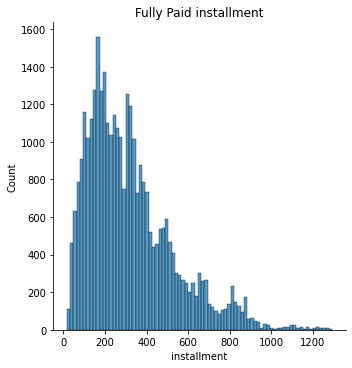

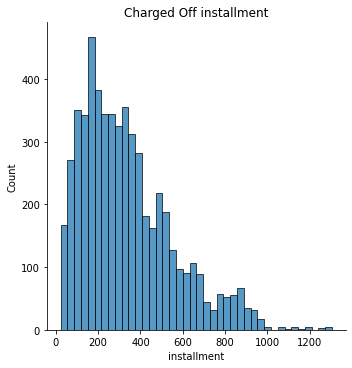

In [46]:
sns.displot(loan_fullypaid['installment']).set(title='Fully Paid installment');
sns.displot(x=loan_chargedoff['installment']).set(title='Charged Off installment');

Inference: Frequencey for Fully charged is more than the charged off. Indicates there are less funded defaulters 

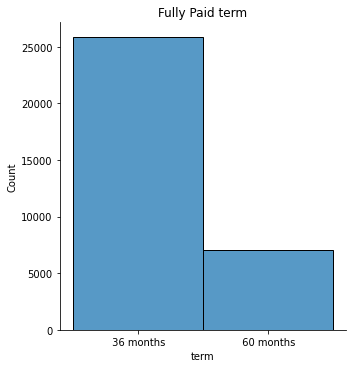

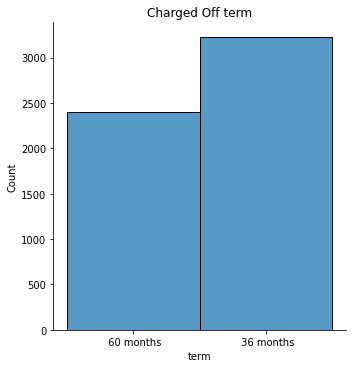

In [47]:
sns.displot(loan_fullypaid['term']).set(title='Fully Paid term');
sns.displot(x=loan_chargedoff['term']).set(title='Charged Off term');

Inference: Frequencey for Fully charged has opposite trend of charged off. There are more defaulters with 36 months term.


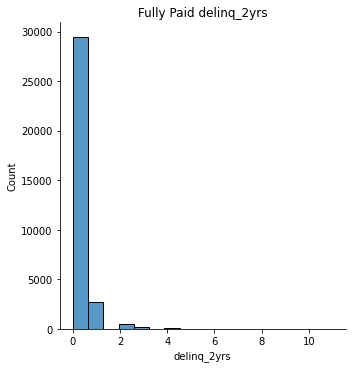

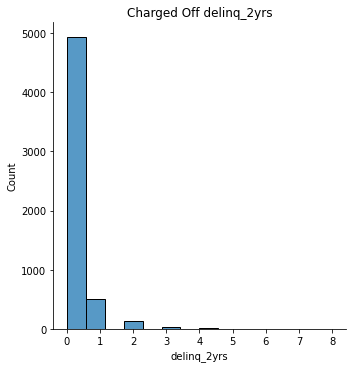

In [48]:
sns.displot(loan_fullypaid['delinq_2yrs']).set(title='Fully Paid delinq_2yrs');
sns.displot(x=loan_chargedoff['delinq_2yrs']).set(title='Charged Off delinq_2yrs');

Inference: Frequencey for Fully charged has same trend as charged off.

Inference: Employee length of defaulters is lesser 

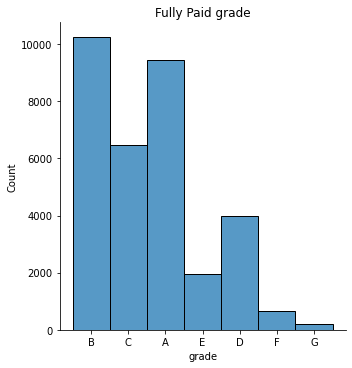

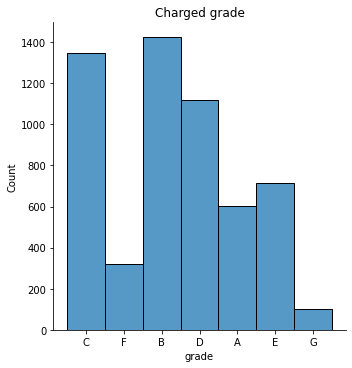

In [49]:
sns.displot(loan_fullypaid['grade']).set(title='Fully Paid grade');
sns.displot(x=loan_chargedoff['grade']).set(title='Charged grade');

Inference: Defaulters have lesser A grades and more C and D grades

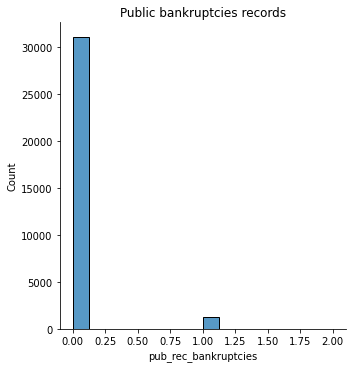

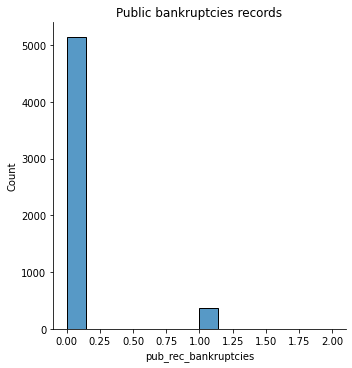

In [50]:
sns.displot(loan_fullypaid['pub_rec_bankruptcies']).set(title='Public bankruptcies records');
sns.displot(x=loan_chargedoff['pub_rec_bankruptcies']).set(title='Public bankruptcies records');

Inference: Defaulters have more higher public Banckcorrupcy records i.e 1.0

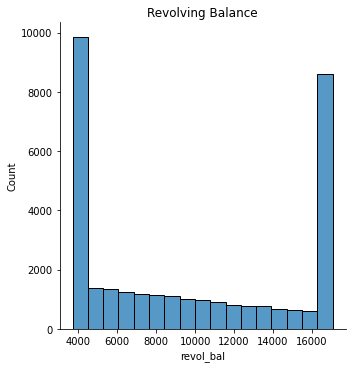

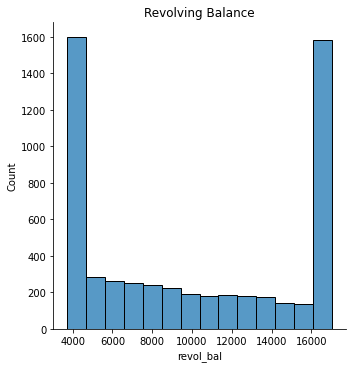

In [51]:
sns.displot(loan_fullypaid['revol_bal']).set(title='Revolving Balance');
sns.displot(x=loan_chargedoff['revol_bal']).set(title='Revolving Balance');

Inference: Defaulters have less freqency of revolving balance 

## Bi-Variate Analysis - Find the co-relation between different variables 

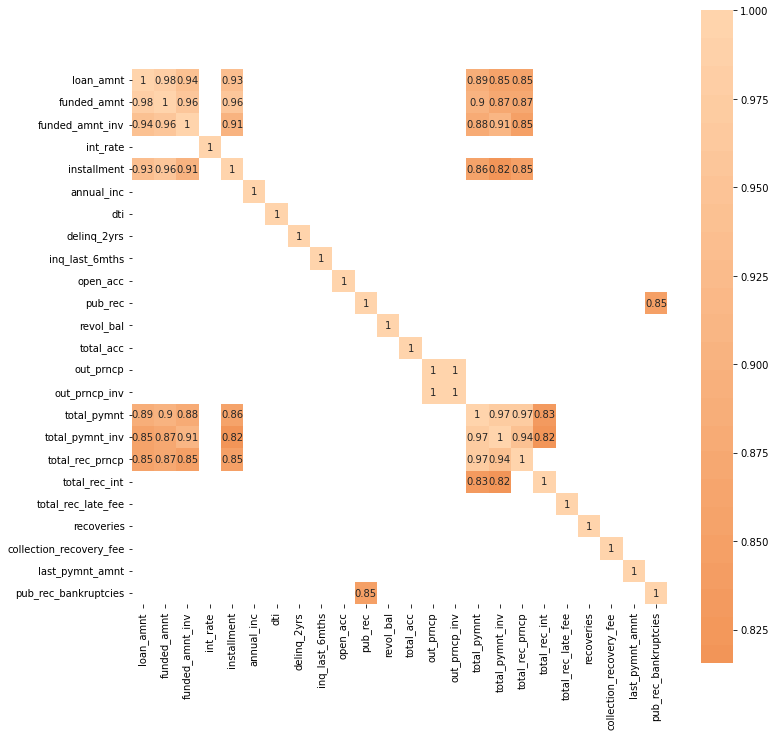

In [52]:
# create correlation matrix with abs values
# create correlation matrix with abs values
corr_matrix = df[cont].corr()
# change this value as needed, if 0.5 does not work for your scenario
threshold = 0.8

filtered_corr_df = corr_matrix[(corr_matrix >= threshold)] 

plt.figure(figsize=(12,12))
sns.heatmap(filtered_corr_df, square=True,center=0, annot=True)
plt.show()

Inference: Loan amount and funded amount are highly co-rleated and are also co-related to total paymnt ,total payment investor variables.

### Bi-Variate analysis between loan amount and loan status (target variable)

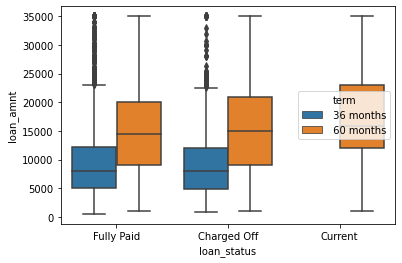

In [53]:
sns.boxplot(y=df['loan_amnt'],x=df['loan_status'],hue=df['term']);

Inference: Above plot indicates that, there is not much significant impact of loan amount on status between the term 36/60 months as the median of both Fully Paid and Charged Off are at the same level

### Bi-Variate analysis between Funded amount and loan status (target variable)

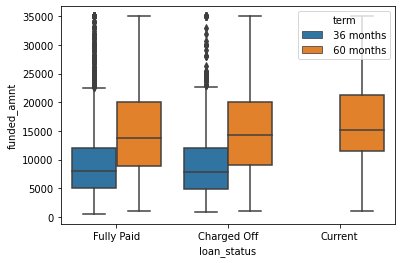

In [54]:
sns.boxplot(y=df['funded_amnt'],x=df['loan_status'],hue=df['term']);

Inference: Above plot indicates that, there is not much significant impact of loan amount on status between the term 36 /60 months

### Bi-Variate analysis between total_pymnt and loan status (target variable)

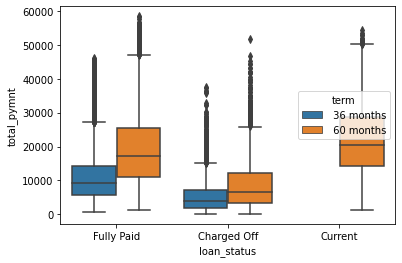

In [55]:
sns.boxplot(y=df['total_pymnt'],x=df['loan_status'],hue=df['term']);

Inference: Above plot indicates there is impact of total_pymnt on staus for the term 36 /60 months

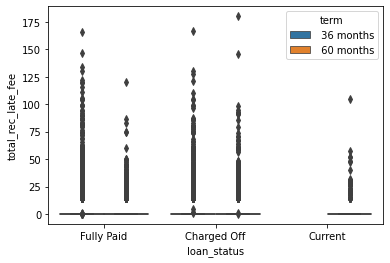

In [56]:
sns.boxplot(y=df['total_rec_late_fee'],x=df['loan_status'],hue=df['term']);

### Bi-Variate analysis between pub_rec_bankruptcies and loan status (target variable)

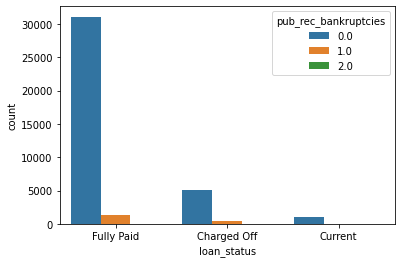

In [57]:
sns.countplot(x=df['loan_status'],hue=df['pub_rec_bankruptcies']);

### Bi-Variate analysis between deliquency and loan status (target variable)

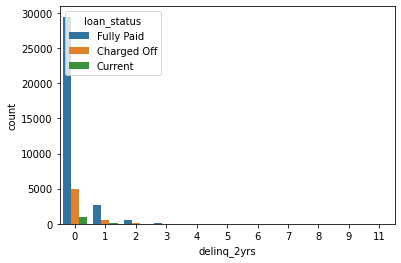

In [58]:
sns.countplot(hue=df['loan_status'],x=df['delinq_2yrs']);

Inference: Above plot indicates that some cases with delinquecies in the period of 2 years were defaulters 

### Bi-Variate analysis between total late received fee and loan status (target variable)

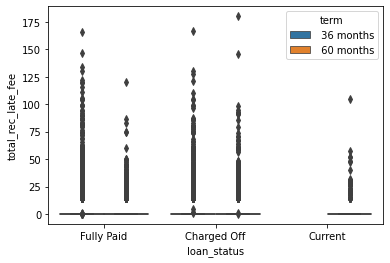

In [59]:
sns.boxplot(y=df['total_rec_late_fee'],x=df['loan_status'],hue=df['term']);

Inference: Above plot indicates higher the late fees, more are the chances of charged off status i.e defaulting 

### Bi-Variate analysis between employee length and loan status (target variable)

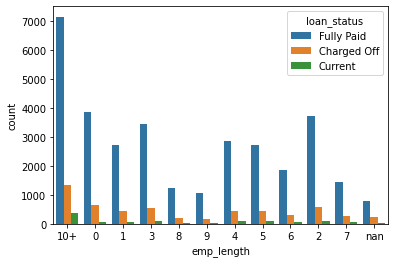

In [60]:
sns.countplot(hue=df['loan_status'],x=df['emp_length']);

Inference: There are more defaulters with employee length less tha 1 and more than 10 
    

### Bi-Variate analysis between grade and loan status (target variable)

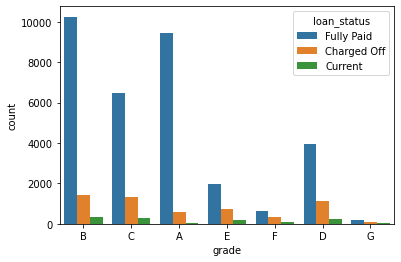

In [61]:
sns.countplot(hue=df['loan_status'],x=df['grade']);

Inference: Many defaulters are with grade B,C,and D

In [62]:
df[df['loan_status'] != 'Current']['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 38577, dtype: object

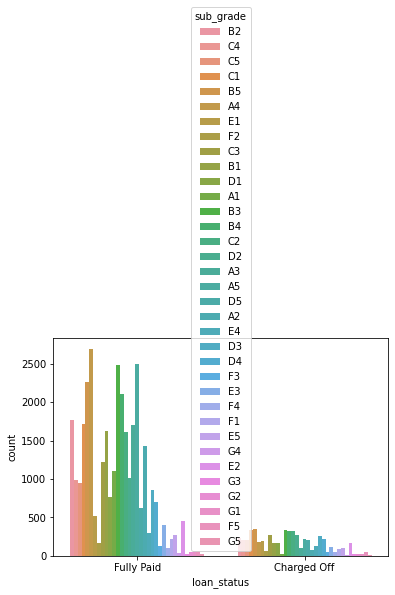

In [63]:
sns.countplot(hue=df['sub_grade'],x=df[df['loan_status'] != 'Current']['loan_status']);

### Bi-Variate analysis between revolving balance and loan status (target variable)

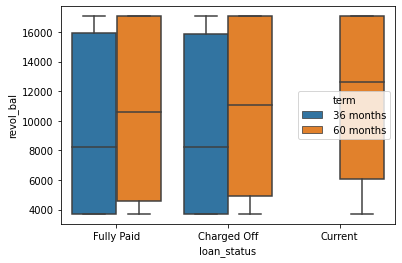

In [64]:
#sns.countplot(hue=df['revol_bal'],x=df['loan_status']);
sns.boxplot(y=df['revol_bal'],x=df['loan_status'],hue=df['term']);

Inference: Revolving Balance has median higher for 60 months than 36 months, this indicates mroe the term more people need revolving options to repay

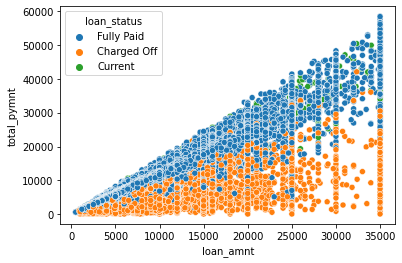

In [65]:
sns.scatterplot(y=df['total_pymnt'],x=df['loan_amnt'],hue=df['loan_status']);

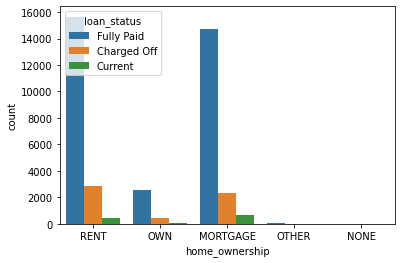

In [66]:
sns.countplot(hue=df['loan_status'],x=df['home_ownership']);

Inference: Defaulting Customers have rented or mortgage home ownership
